# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold reponse info
city_id = []
weather_cities = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Get weather data
counter = 1
for name in cities:
    try:
        weather_response = requests.get(query_url + name).json()
        weather_cities.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        long.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        if counter == 50:
            print(f" Processing Record Number: {counter} | {name}")
            city_id.append(counter)
            counter = counter + 1
            time.sleep(60)
        else:
            print(f" Processing Record Number: {counter} | {name}")
            city_id.append(counter)
            counter = counter + 1
    except KeyError:
        print("City not found. Skipping...")

 Processing Record Number: 1 | raton
City not found. Skipping...
 Processing Record Number: 2 | port alfred
City not found. Skipping...
 Processing Record Number: 3 | hobart
 Processing Record Number: 4 | bengkulu
 Processing Record Number: 5 | porto walter
 Processing Record Number: 6 | rikitea
 Processing Record Number: 7 | souris
 Processing Record Number: 8 | punta arenas
 Processing Record Number: 9 | mataura
 Processing Record Number: 10 | qaanaaq
 Processing Record Number: 11 | gornopravdinsk
 Processing Record Number: 12 | jutai
 Processing Record Number: 13 | avarua
 Processing Record Number: 14 | hithadhoo
 Processing Record Number: 15 | busselton
 Processing Record Number: 16 | pontes e lacerda
 Processing Record Number: 17 | cabo san lucas
 Processing Record Number: 18 | ushuaia
City not found. Skipping...
 Processing Record Number: 19 | bambous virieux
 Processing Record Number: 20 | puerto ayora
 Processing Record Number: 21 | mar del plata
 Processing Record Number: 22 |

 Processing Record Number: 184 | tomatlan
 Processing Record Number: 185 | zhanaozen
 Processing Record Number: 186 | akyab
 Processing Record Number: 187 | ullapool
 Processing Record Number: 188 | nishihara
 Processing Record Number: 189 | puerto varas
 Processing Record Number: 190 | georgetown
 Processing Record Number: 191 | luanda
 Processing Record Number: 192 | muros
 Processing Record Number: 193 | geraldton
 Processing Record Number: 194 | fare
 Processing Record Number: 195 | maroon town
 Processing Record Number: 196 | amapa
 Processing Record Number: 197 | kampene
 Processing Record Number: 198 | thessalon
City not found. Skipping...
 Processing Record Number: 199 | solnechnyy
 Processing Record Number: 200 | port blair
 Processing Record Number: 201 | los llanos de aridane
 Processing Record Number: 202 | korampallam
 Processing Record Number: 203 | chamba
 Processing Record Number: 204 | shimoda
 Processing Record Number: 205 | lewiston
 Processing Record Number: 206 | h

 Processing Record Number: 375 | souillac
 Processing Record Number: 376 | puerto carreno
 Processing Record Number: 377 | bardiyah
 Processing Record Number: 378 | majene
 Processing Record Number: 379 | padang
 Processing Record Number: 380 | myaundzha
 Processing Record Number: 381 | goderich
City not found. Skipping...
 Processing Record Number: 382 | senneterre
 Processing Record Number: 383 | luganville
 Processing Record Number: 384 | forrest city
 Processing Record Number: 385 | alugan
 Processing Record Number: 386 | hasaki
 Processing Record Number: 387 | tombouctou
 Processing Record Number: 388 | cheney
 Processing Record Number: 389 | coari
 Processing Record Number: 390 | tura
 Processing Record Number: 391 | leticia
 Processing Record Number: 392 | skelleftea
 Processing Record Number: 393 | verkhnyaya inta
 Processing Record Number: 394 | kangaatsiaq
 Processing Record Number: 395 | hare bay
 Processing Record Number: 396 | vardo
 Processing Record Number: 397 | ust-may

 Processing Record Number: 556 | vage
 Processing Record Number: 557 | vallenar
 Processing Record Number: 558 | satellite beach
 Processing Record Number: 559 | zyryanka
 Processing Record Number: 560 | aktau
 Processing Record Number: 561 | gazli
 Processing Record Number: 562 | progreso
 Processing Record Number: 563 | walvis bay
City not found. Skipping...
 Processing Record Number: 564 | la carolina
 Processing Record Number: 565 | maldonado
 Processing Record Number: 566 | nizhnevartovsk
 Processing Record Number: 567 | kasimov
City not found. Skipping...
 Processing Record Number: 568 | cristalina
 Processing Record Number: 569 | daru
 Processing Record Number: 570 | helsinki
 Processing Record Number: 571 | baykit
 Processing Record Number: 572 | son la
 Processing Record Number: 573 | muzhi
 Processing Record Number: 574 | port augusta
 Processing Record Number: 575 | tucuman
 Processing Record Number: 576 | viradouro
 Processing Record Number: 577 | brae
 Processing Record Nu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a data frame from the information above
weather_data_df = pd.DataFrame({"City ID" : city_id,
                                "City" : weather_cities,
                                "Country" : country,
                                "Latitude" : lat,
                                "Longitude" : long,
                                "Max. Temp (F)" : max_temp,
                                "Humidity" : humidity,
                                "Cloudiness" : cloudiness,
                                "Wind Speed" : wind_speed,
                                "Date" : date})

# Save the dataframe to a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data_df.to_csv("../output_data/cities.csv", encoding = "utf-8", index = False)

# Display the dataframe to the terminal
weather_data_df

,City ID,City,Country,Latitude,Longitude,Max. Temp (F),Humidity,Cloudiness,Wind Speed,Date
0,1,Raton,US,36.9034,-104.4391,38.59,27,0,5.75,1643509459
1,2,Port Alfred,ZA,-33.5906,26.8910,68.13,87,14,7.63,1643509194
2,3,Hobart,AU,-42.8794,147.3294,80.02,51,20,1.01,1643509421
3,4,Bengkulu,ID,-3.8004,102.2655,79.97,81,100,3.89,1643509460
4,5,Porto Walter,BR,-8.2686,-72.7439,73.63,97,100,1.57,1643509460
...,...,...,...,...,...,...,...,...,...,...
581,582,Hokitika,NZ,-42.7167,170.9667,68.41,61,55,9.82,1643509750
582,583,Wiset Chai Chan,TH,14.5989,100.3617,82.02,52,35,4.09,1643509750
583,584,San Quintín,MX,30.4833,-115.9500,59.81,64,2,7.65,1643509750
584,585,Tilichiki,RU,60.4667,166.1000,13.03,77,24,16.60,1643509751


In [5]:
# Display the dataframe statistics
weather_data_df.describe()

,City ID,Latitude,Longitude,Max. Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,293.500000,20.970034,18.511457,48.266741,74.385666,60.709898,7.745751,1.643510e+09
std,169.307905,32.733809,90.436553,31.177891,19.920047,40.553451,6.478805,1.068093e+02
min,1.000000,-54.800000,-175.200000,-27.360000,11.000000,0.000000,0.000000,1.643509e+09
25%,147.250000,-4.035775,-65.192525,25.990000,64.000000,15.000000,3.150000,1.643510e+09
50%,293.500000,23.170450,20.988750,58.065000,78.000000,75.000000,5.990000,1.643510e+09
75%,439.750000,49.775100,98.716850,74.385000,89.000000,100.000000,10.395000,1.643510e+09
max,586.000000,78.218600,179.316700,97.700000,100.000000,100.000000,47.330000,1.643510e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_test_value = weather_data_df["Humidity"].max()

In [7]:
#  Get the indices of cities that have humidity over 100%.

# If there is at least 1 city with a humidity over 100%
# Create a list of indices of the the cities that have humidity over 100%
if humidity_test_value > 100:
    humidity_over_100_df = weather_data_df.loc[weather_data_df["Humidity"] > 100, :]
    humidity_over_100_indices = humidity_over_100_df.index, tolist()
    print(humidity_over_100_indices)
# If there are no cities with humidity over 100%
else:
    print("There are no cities with humidity > 100%")

There are no cities with humidity > 100%


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# If there is at least 1 city with a humidity over 100%
# Create a dataframe without the cities with humidity over 100%
if humidity_test_value > 100:
    clean_city_data = weather_data_df.drop(humidity_over_100_indices, inplace = False)
else:
    clean_city_data = weather_data_df.copy()

# Display the new dataframe to the terminal
clean_city_data

,City ID,City,Country,Latitude,Longitude,Max. Temp (F),Humidity,Cloudiness,Wind Speed,Date
0,1,Raton,US,36.9034,-104.4391,38.59,27,0,5.75,1643509459
1,2,Port Alfred,ZA,-33.5906,26.8910,68.13,87,14,7.63,1643509194
2,3,Hobart,AU,-42.8794,147.3294,80.02,51,20,1.01,1643509421
3,4,Bengkulu,ID,-3.8004,102.2655,79.97,81,100,3.89,1643509460
4,5,Porto Walter,BR,-8.2686,-72.7439,73.63,97,100,1.57,1643509460
...,...,...,...,...,...,...,...,...,...,...
581,582,Hokitika,NZ,-42.7167,170.9667,68.41,61,55,9.82,1643509750
582,583,Wiset Chai Chan,TH,14.5989,100.3617,82.02,52,35,4.09,1643509750
583,584,San Quintín,MX,30.4833,-115.9500,59.81,64,2,7.65,1643509750
584,585,Tilichiki,RU,60.4667,166.1000,13.03,77,24,16.60,1643509751


In [9]:
# Display the dataframe statistics
clean_city_data.describe()

,City ID,Latitude,Longitude,Max. Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,293.500000,20.970034,18.511457,48.266741,74.385666,60.709898,7.745751,1.643510e+09
std,169.307905,32.733809,90.436553,31.177891,19.920047,40.553451,6.478805,1.068093e+02
min,1.000000,-54.800000,-175.200000,-27.360000,11.000000,0.000000,0.000000,1.643509e+09
25%,147.250000,-4.035775,-65.192525,25.990000,64.000000,15.000000,3.150000,1.643510e+09
50%,293.500000,23.170450,20.988750,58.065000,78.000000,75.000000,5.990000,1.643510e+09
75%,439.750000,49.775100,98.716850,74.385000,89.000000,100.000000,10.395000,1.643510e+09
max,586.000000,78.218600,179.316700,97.700000,100.000000,100.000000,47.330000,1.643510e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

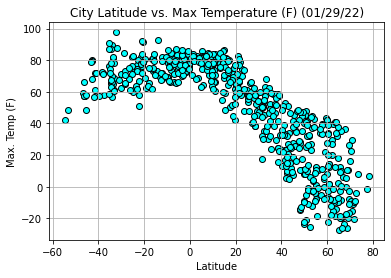

In [10]:
# Create a scatter plot based upon the above data
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max. Temp (F)"], color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Max Temperature (F) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temp (F)")
# Add grid
plt.grid()
plt.savefig("../output_data/Figure1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [11]:
print("The code is analyzing the relationship between Temperature as the Latitude moves from the southern to the northern hemisphere. The changes showed that north and osuth hemispheres are having opposite seasons")

The code is analyzing the relationship between Temperature as the Latitude moves from the southern to the northern hemisphere. The changes showed that north and osuth hemispheres are having opposite seasons


## Latitude vs. Humidity Plot

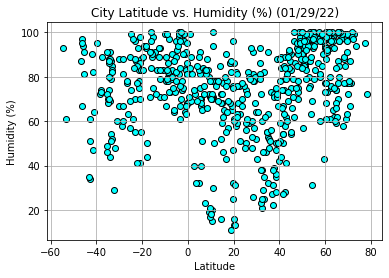

In [12]:
# Create a scatter plot based upon the above data
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Humidity (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Add grid
plt.grid()
plt.savefig("../output_data/Figure2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [13]:
print("The code is analyzing the relationship between Humidity and a city's location on the planet. From the data, it appears that cities with Latitudes between 0 and 40 degrees are experiencing a wider range of Humidity values compared to other Latitude values.")

The code is analyzing the relationship between Humidity and a city's location on the planet. From the data, it appears that cities with Latitudes between 0 and 40 degrees are experiencing a wider range of Humidity values compared to other Latitude values.


## Latitude vs. Cloudiness Plot

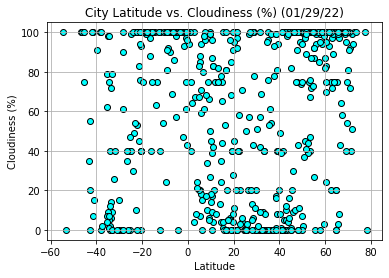

In [14]:
# Create a scatter plot based upon the above data
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Cloudiness (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Add grid
plt.grid()
plt.savefig("../output_data/Figure3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [15]:
print("The code is analyzing the relationship between the chances of cloudiness and a city's location on the planet. From the data, it appears that the Latitude has a weak correlation with a city's chances of cloudiness.")

The code is analyzing the relationship between the chances of cloudiness and a city's location on the planet. From the data, it appears that the Latitude has a weak correlation with a city's chances of cloudiness.


## Latitude vs. Wind Speed Plot

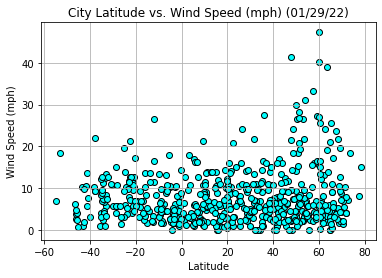

In [16]:
# Create a scatter plot based upon the above data
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Wind Speed (mph) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Add grid
plt.grid()
plt.savefig("../output_data/Figure4.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [17]:
print("The code is analyzing the relationship between wind speeds and a city's location on the planet. From the data, it appears that the cities in the Latitude range of 40 to 60 degrees have greater chances of experiencing winds of stronger than 30mph compared to the rest of the locations.")

The code is analyzing the relationship between wind speeds and a city's location on the planet. From the data, it appears that the cities in the Latitude range of 40 to 60 degrees have greater chances of experiencing winds of stronger than 30mph compared to the rest of the locations.


## Linear Regression

In [18]:
northern_hemisphere_city_data = clean_city_data.loc[clean_city_data["Latitude"] >= 0, :]
southern_hemisphere_city_data = clean_city_data.loc[clean_city_data["Latitude"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:: -0.8636364627381949
The r-squared is: 0.7458679397709416


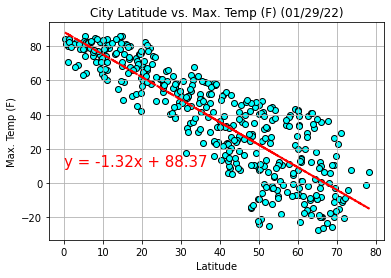

In [19]:
# Perform a linear regression on Latitude vs. Max. Temp
ntemp_slope, ntemp_int, ntemp_r, ntemp_p, ntemp_std_err = st.linregress(northern_hemisphere_city_data["Latitude"], 
                                                                   northern_hemisphere_city_data["Max. Temp (F)"])
# Create equation of line to calculate predicted violent crime rate
ntemp_fit = ntemp_slope * northern_hemisphere_city_data["Latitude"] + ntemp_int
# Print R value
print(f"The r-value is:: {ntemp_r}")
print(f"The r-squared is: {ntemp_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(northern_hemisphere_city_data["Latitude"], northern_hemisphere_city_data["Max. Temp (F)"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Max. Temp (F) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temp (F)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(northern_hemisphere_city_data["Latitude"], ntemp_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(ntemp_slope,2)) + "x + " + str(round(ntemp_int,2))
plt.annotate(line_eq,(0,10), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure5.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:: 0.4274668388180315
The r-squared is: 0.18272789828908093


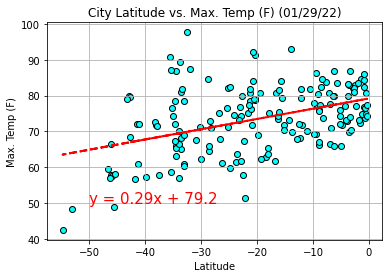

In [20]:
# Perform a linear regression on Latitude vs. Max. Temp
stemp_slope, stemp_int, stemp_r, stemp_p, stemp_std_err = st.linregress(southern_hemisphere_city_data["Latitude"], 
                                                                   southern_hemisphere_city_data["Max. Temp (F)"])
# Create equation of line to calculate predicted violent crime rate
stemp_fit = stemp_slope * southern_hemisphere_city_data["Latitude"] + stemp_int
# Print R value
print(f"The r-value is:: {stemp_r}")
print(f"The r-squared is: {stemp_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(southern_hemisphere_city_data["Latitude"], southern_hemisphere_city_data["Max. Temp (F)"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Max. Temp (F) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temp (F)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(southern_hemisphere_city_data["Latitude"], stemp_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(stemp_slope,2)) + "x + " + str(round(stemp_int,2))
plt.annotate(line_eq,(-50,50), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure6.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [21]:
print("Examining the plots and R values, it appears that for the northern hemisphere there is a strong correlation between the max temperature of a city to it's latitude location. It can't be said to be the same for cities in the southern hemisphere, the R value is suggesting a weak correlation between latitude location and max temperature.")

Examining the plots and R values, it appears that for the northern hemisphere there is a strong correlation between the max temperature of a city to it's latitude location. It can't be said to be the same for cities in the southern hemisphere, the R value is suggesting a weak correlation between latitude location and max temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:: 0.4160303025275137
The r-squared is: 0.1730812126211346


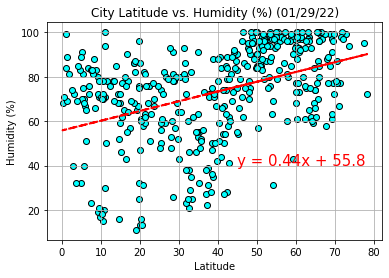

In [22]:
# Perform a linear regression on Latitude vs. Humidity
nhumi_slope, nhumi_int, nhumi_r, nhumi_p, nhumi_std_err = st.linregress(northern_hemisphere_city_data["Latitude"], 
                                                                   northern_hemisphere_city_data["Humidity"])
# Create equation of line to calculate predicted violent crime rate
nhumi_fit = nhumi_slope * northern_hemisphere_city_data["Latitude"] + nhumi_int
# Print R value
print(f"The r-value is:: {nhumi_r}")
print(f"The r-squared is: {nhumi_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(northern_hemisphere_city_data["Latitude"], northern_hemisphere_city_data["Humidity"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Humidity (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(northern_hemisphere_city_data["Latitude"], nhumi_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(nhumi_slope,2)) + "x + " + str(round(nhumi_int,2))
plt.annotate(line_eq,(45,40), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure7.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:: 0.2615149666714212
The r-squared is: 0.06839007779315455


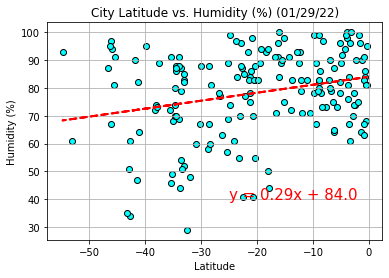

In [23]:
# Perform a linear regression on Latitude vs. Humidity
shumi_slope, shumi_int, shumi_r, shumi_p, shumi_std_err = st.linregress(southern_hemisphere_city_data["Latitude"], 
                                                                   southern_hemisphere_city_data["Humidity"])
# Create equation of line to calculate predicted violent crime rate
shumi_fit = shumi_slope * southern_hemisphere_city_data["Latitude"] + shumi_int
# Print R value
print(f"The r-value is:: {shumi_r}")
print(f"The r-squared is: {shumi_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(southern_hemisphere_city_data["Latitude"], southern_hemisphere_city_data["Humidity"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Humidity (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(southern_hemisphere_city_data["Latitude"], shumi_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(shumi_slope,2)) + "x + " + str(round(shumi_int,2))
plt.annotate(line_eq,(-25,40), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure8.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [31]:
print("The data is suggesting that the northern hemisphere has a weak correlation between humidity levels and latitude locations, the southern hemisphere locations shows very weak correlations between the 2 factors. The R values support these statements.")

The data is suggesting that the northern hemisphere has a weak correlation between humidity levels and latitude locations, the southern hemisphere locations shows very weak correlations between the 2 factors. The R values support these statements.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:: 0.3365987456017402
The r-squared is: 0.11329871554066501


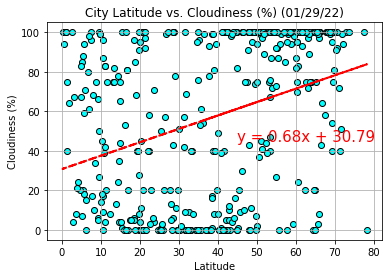

In [25]:
# Perform a linear regression on Latitude vs. Cloudiness
nclou_slope, nclou_int, nclou_r, nclou_p, nclou_std_err = st.linregress(northern_hemisphere_city_data["Latitude"], 
                                                                   northern_hemisphere_city_data["Cloudiness"])
# Create equation of line to calculate predicted violent crime rate
nclou_fit = nclou_slope * northern_hemisphere_city_data["Latitude"] + nclou_int
# Print R value
print(f"The r-value is:: {nclou_r}")
print(f"The r-squared is: {nclou_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(northern_hemisphere_city_data["Latitude"], northern_hemisphere_city_data["Cloudiness"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Cloudiness (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(northern_hemisphere_city_data["Latitude"], nclou_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(nclou_slope,2)) + "x + " + str(round(nclou_int,2))
plt.annotate(line_eq,(45,45), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure9.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:: 0.45728652925721863
The r-squared is: 0.20911096984011307


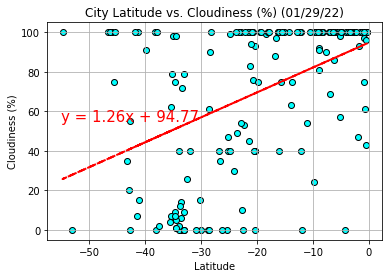

In [26]:
# Perform a linear regression on Latitude vs. Cloudiness
sclou_slope, sclou_int, sclou_r, sclou_p, sclou_std_err = st.linregress(southern_hemisphere_city_data["Latitude"], 
                                                                   southern_hemisphere_city_data["Cloudiness"])
# Create equation of line to calculate predicted violent crime rate
sclou_fit = sclou_slope * southern_hemisphere_city_data["Latitude"] + sclou_int
# Print R value
print(f"The r-value is:: {sclou_r}")
print(f"The r-squared is: {sclou_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(southern_hemisphere_city_data["Latitude"], southern_hemisphere_city_data["Cloudiness"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Cloudiness (%) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(southern_hemisphere_city_data["Latitude"], sclou_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(sclou_slope,2)) + "x + " + str(round(sclou_int,2))
plt.annotate(line_eq,(-55,55), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure10.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [32]:
print("The data is suggesting a weak correlation between cloudiness and latitude locations. The R values for both northern and southern hemispheres are reflecting weak correlation between the 2 factors.")

The data is suggesting a weak correlation between cloudiness and latitude locations. The R values for both northern and southern hemispheres are reflecting weak correlation between the 2 factors.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:: 0.15190792535492334
The r-squared is: 0.023076017785636962


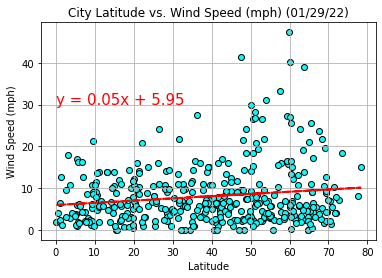

In [28]:
# Perform a linear regression on Latitude vs. Wind Speed
nwind_slope, nwind_int, nwind_r, nwind_p, nwind_std_err = st.linregress(northern_hemisphere_city_data["Latitude"], 
                                                                   northern_hemisphere_city_data["Wind Speed"])
# Create equation of line to calculate predicted violent crime rate
nwind_fit = nwind_slope * northern_hemisphere_city_data["Latitude"] + nwind_int
# Print R value
print(f"The r-value is:: {nwind_r}")
print(f"The r-squared is: {nwind_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(northern_hemisphere_city_data["Latitude"], northern_hemisphere_city_data["Wind Speed"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Wind Speed (mph) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(northern_hemisphere_city_data["Latitude"], nwind_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(nwind_slope,2)) + "x + " + str(round(nwind_int,2))
plt.annotate(line_eq,(0,30), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure11.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:: -0.14746946841594882
The r-squared is: 0.021747244114882526


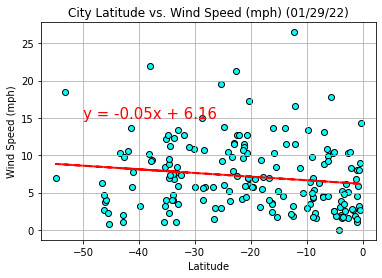

In [35]:
# Perform a linear regression on Latitude vs. Wind Speed
swind_slope, swind_int, swind_r, swind_p, swind_std_err = st.linregress(southern_hemisphere_city_data["Latitude"], 
                                                                   southern_hemisphere_city_data["Wind Speed"])
# Create equation of line to calculate predicted violent crime rate
swind_fit = swind_slope * southern_hemisphere_city_data["Latitude"] + swind_int
# Print R value
print(f"The r-value is:: {swind_r}")
print(f"The r-squared is: {swind_r**2}")
# Create a scatter plot based upon the above data
plt.scatter(southern_hemisphere_city_data["Latitude"], southern_hemisphere_city_data["Wind Speed"], 
            color = "cyan", edgecolors = "black")
# Add title and labels to X and Y axes
plt.title("City Latitude vs. Wind Speed (mph) (01/29/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Add grid
plt.grid()
# Plot the linear model on top of scatter plot
plt.plot(southern_hemisphere_city_data["Latitude"], swind_fit, "r--", linewidth = 2)
# Add equation line
line_eq = "y = " + str(round(swind_slope,2)) + "x + " + str(round(swind_int,2))
plt.annotate(line_eq,(-50,15), fontsize = 15, color = "red")
plt.savefig("../output_data/Figure12.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ="b",
            orientation ="landscape")
plt.show()

In [30]:
print("The data is suggesting there is a very weak to no correlation at all between the wind speeds and latitude locations. The R values for both northern and southern hemispheres are reflecting very weak correlation between the 2 factors.")

The data is suggesting there is a very weak to no correlation at all between the wind speeds and latitude locations. The R values for both northern and southern hemispheres are reflecting very weak correlation between the 2 factors.
